In [9]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [20]:
# load dataset
dataset = pd.read_csv("data/1SEP.csv")


In [21]:
#dataset = dataset[(dataset['Hosts_Competitions']=='Low')]

In [22]:
dataset.head()

,RTT_avg,RTT_stdev,Aggregated_RTT_AVG,Aggregated_RTT_stdev,Duplicate_acks,Triple_dupacks,Max_retrans,Min_retr_time,Max_retr_time,Avg_retr_time,...,Segments_in_Low,Segments_in_High,lresolutionsbystall,Bandwidth,Packetloss,Hosts_Competitions,MPD,Total_Packets,Througput,RTT_Samples
0,0.1,1.6,0.16,1.82,1,0,0,0,0,0,...,2,43,Stall_in_Stream,High,No,Low,BIG_BUCK_BUNNY,17778,778213,15428
1,0.1,1.7,0.16,1.82,1,0,0,0,0,0,...,2,43,Stall_in_Stream,High,No,Low,BIG_BUCK_BUNNY,22507,779871,19312
2,0.1,1.7,0.10,1.60,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,22910,713700,19980
3,0.1,1.5,0.10,1.60,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,21675,713665,19016
4,0.1,1.5,0.10,1.60,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,22008,713593,19331


In [23]:
#y_pred = (y_pred > 0.5) 

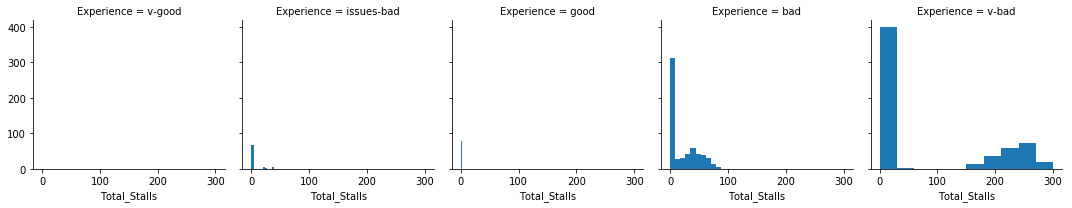

In [27]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stalls')

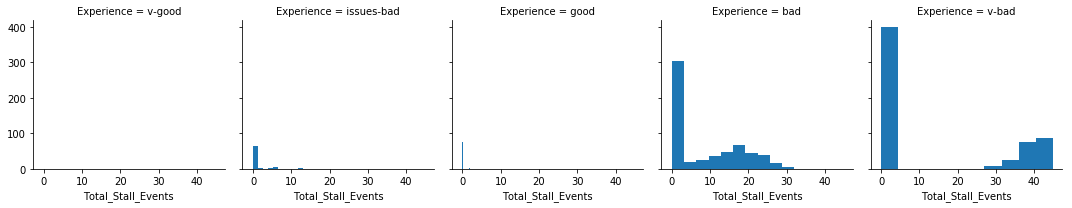

In [28]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stall_Events')

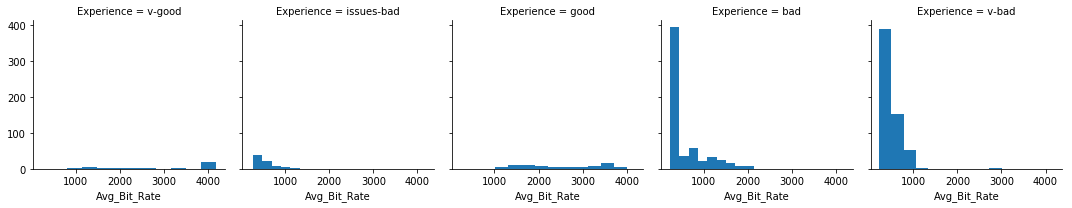

In [29]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Avg_Bit_Rate')

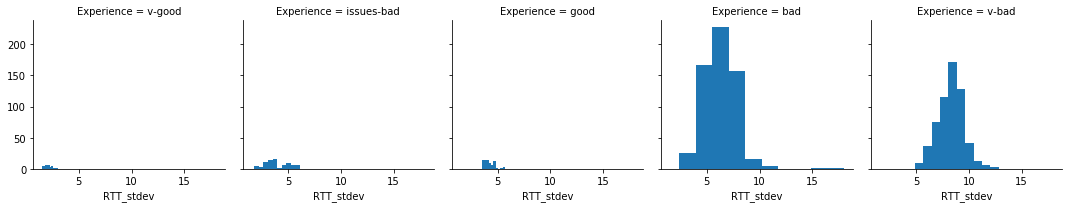

In [30]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_stdev')

In [31]:
myP = ["#c26b00", "#242526", "#82096e", "#103009", "#34495e", "#c26b00", "#c2a200", "#0015b8", "#78282a", "#fc030b"]


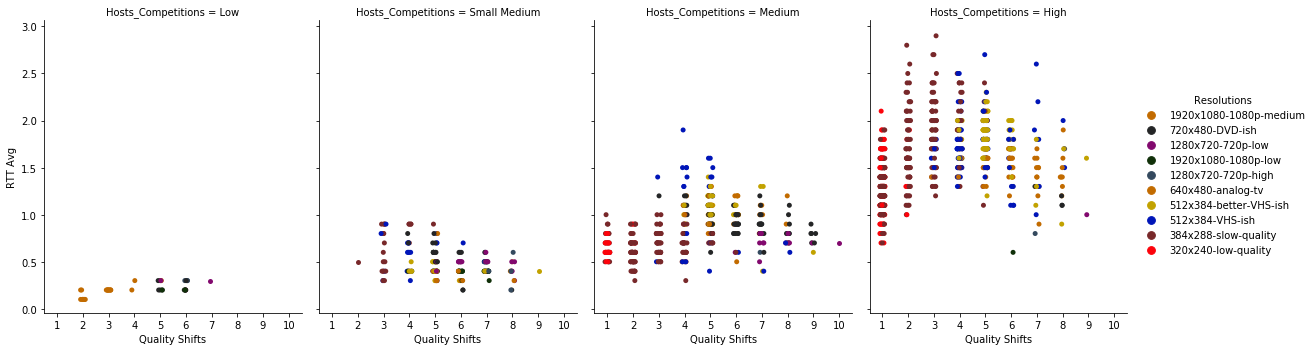

In [32]:
g = sns.catplot(x="Shifts_Quality", y="RTT_avg", col="Hosts_Competitions",palette=myP, data=dataset, hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Avg")

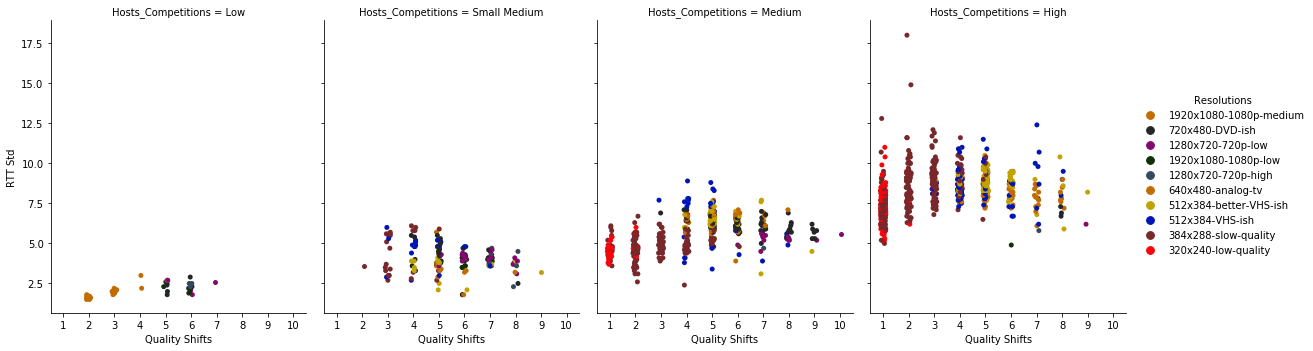

In [33]:
g = sns.catplot(x="Shifts_Quality", y="RTT_stdev", col="Hosts_Competitions",palette=myP, data=dataset,hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Std")

In [34]:
#dataset['RTT_stdev'] = dataset['RTT_stdev'].astype(np.int64)

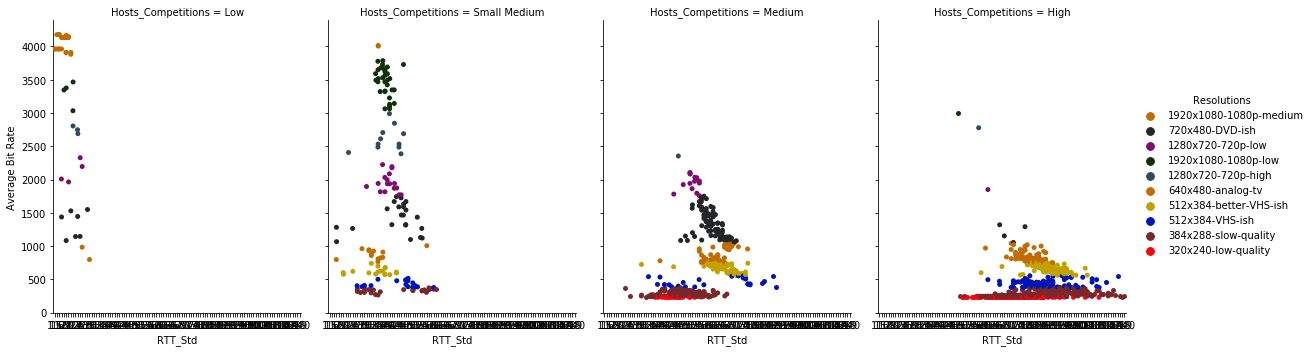

In [35]:
g = sns.catplot(x="RTT_stdev", y="Avg_Bit_Rate", col="Hosts_Competitions", palette=myP,data=dataset, height=5, aspect=.8,hue="Resolutions")
g.set_axis_labels("RTT_Std", "Average Bit Rate")

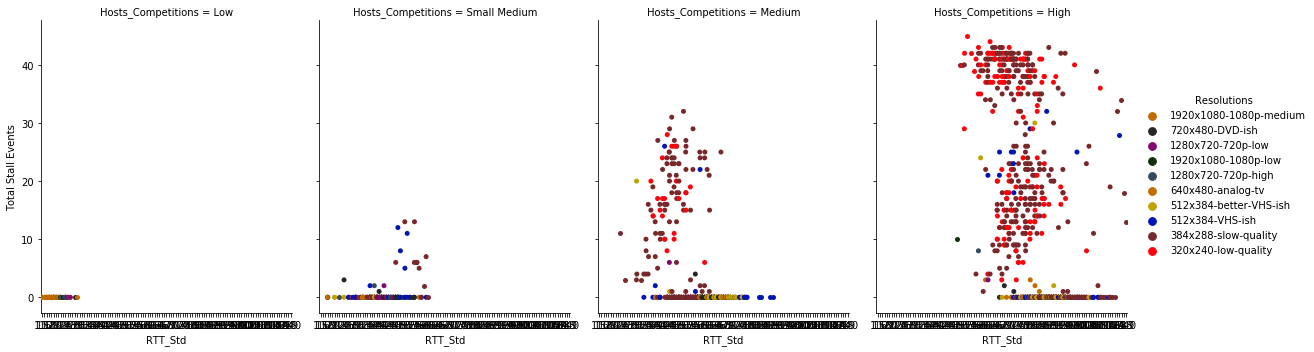

In [36]:
g = sns.catplot(x="RTT_stdev", y="Total_Stall_Events",col="Hosts_Competitions", palette=myP,data=dataset, hue="Resolutions", height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Total Stall Events")

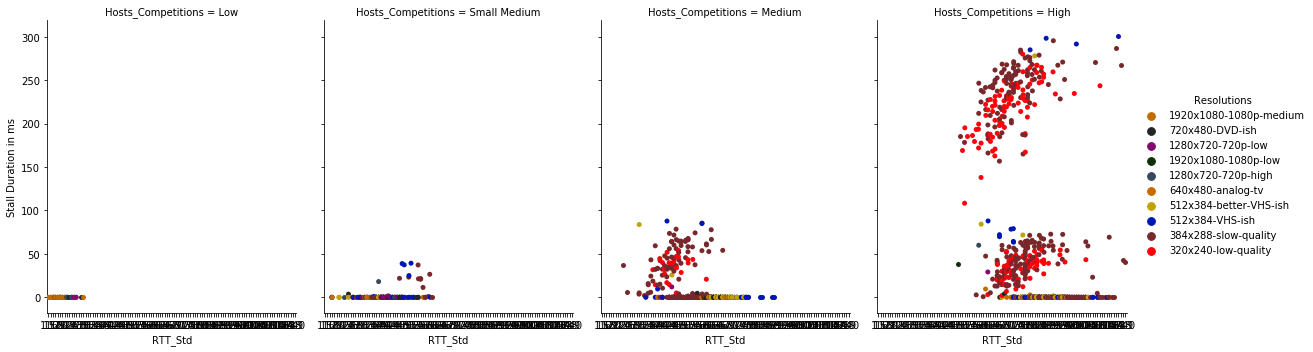

In [37]:
g = sns.catplot(x="RTT_stdev", y="Total_Stalls", hue="Resolutions",col="Hosts_Competitions",palette=myP,data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Stall Duration in ms")

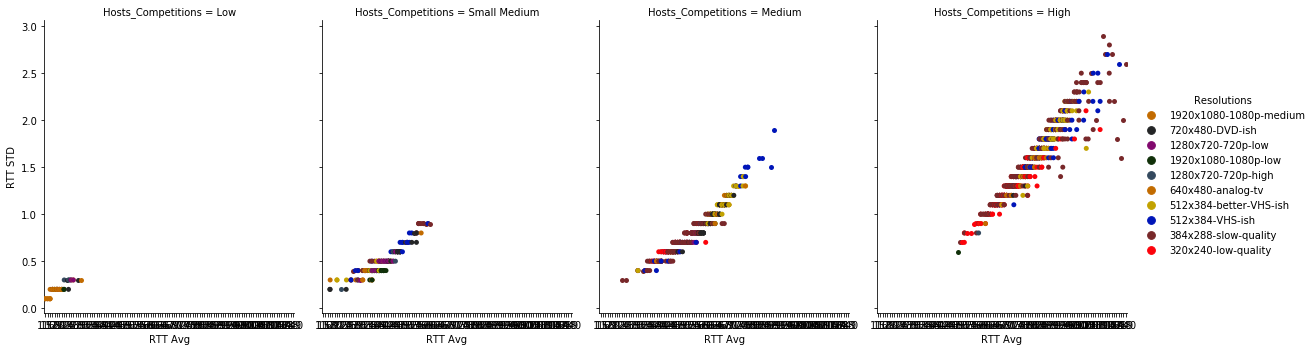

In [38]:
g = sns.catplot(x="RTT_stdev", y="RTT_avg",col="Hosts_Competitions", hue="Resolutions",palette=myP, data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT Avg", "RTT STD")

In [39]:
#dataset1 = pd.read_csv("data/30AUG.csv")

In [40]:

#X = dataset[['RTT_avg', 'RTT_stdev', 'Triple_dupacks','Max_retrans','Min_retr_time','Max_retr_time','Avg_retr_time','Sdv_retr_time','Outoforder_pkts']]
#Y = dataset['Labels']

In [42]:
target_count = dataset.Experience.value_counts()
#print('Class 0:', target_count[0])
#print('Class 1:', target_count[1])

target_count

v-bad         600
bad           600
issues-bad     80
good           80
v-good         40
Name: Experience, dtype: int64

In [43]:
#dataset = dataframe.values
X = dataset.iloc[:,0:12].values


In [44]:
Y = dataset.iloc[:,12].values

In [45]:
Y

array(['v-good', 'v-good', 'v-good', ..., 'v-bad', 'v-bad', 'v-bad'],
      dtype=object)

In [46]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

In [47]:
Y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

W0901 11:37:36.040493 139780546389824 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 11:37:36.256530 139780546389824 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 11:37:36.296210 139780546389824 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 11:37:36.365560 139780546389824 deprecation_wrapper.py:119] From /home/raza/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 11:37:36.4

acc: 72.86%
Train: 0.769, Test: 0.729


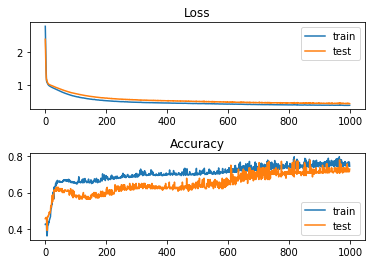

acc: 72.86%
Train: 0.677, Test: 0.729


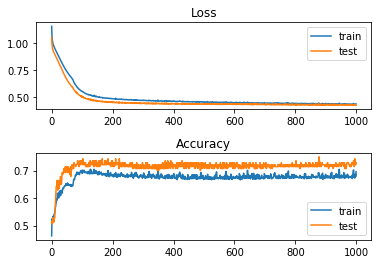

acc: 72.14%
Train: 0.788, Test: 0.721


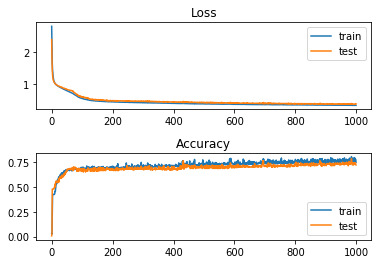

acc: 77.14%
Train: 0.819, Test: 0.771


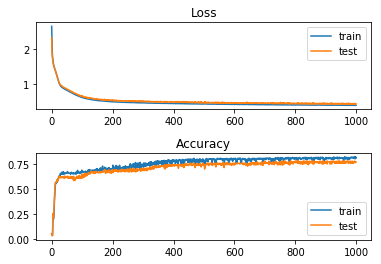

acc: 70.00%
Train: 0.718, Test: 0.700


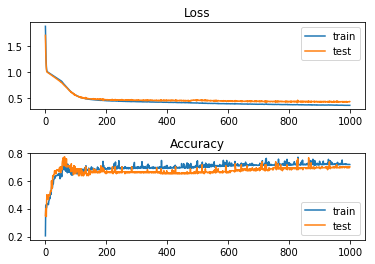

acc: 67.86%
Train: 0.726, Test: 0.679


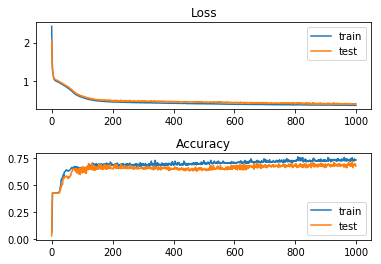

acc: 64.29%
Train: 0.706, Test: 0.643


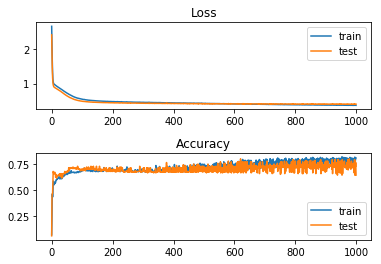

acc: 84.29%
Train: 0.794, Test: 0.843


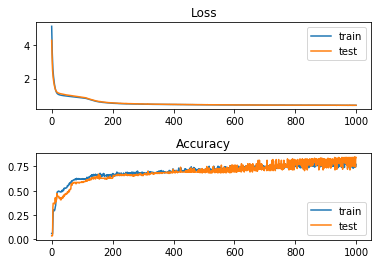

acc: 70.00%
Train: 0.645, Test: 0.700


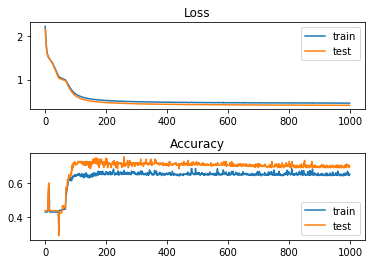

acc: 69.29%
Train: 0.710, Test: 0.693


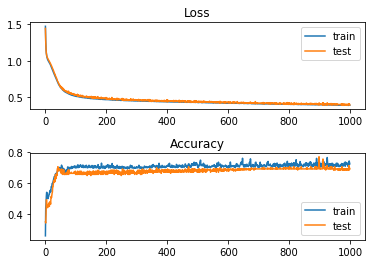

72.07% (+/- 5.20%)


In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(10, input_dim=12, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	history = model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=1000, batch_size=128, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=2)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
	_, train_acc = model.evaluate(X[train], Y[train], verbose=2)
	_, test_acc = model.evaluate(X[test], Y[test], verbose=2)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	plt.subplots_adjust(hspace=0.5)
# plot loss during training
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.legend()
# plot accuracy during training
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(history.history['acc'], label='train')
	plt.plot(history.history['val_acc'], label='test')
	plt.legend()
	plt.show()
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [49]:
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

72.07% (+/- 5.20%)


In [50]:
y_pred = model.predict(X[test])

In [51]:
#y_pred = (y_pred > 0.5) 

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y[test].argmax(axis=1), y_pred.argmax(axis=1))

In [53]:
cm

array([[49,  0,  0, 24,  0],
       [ 0,  7,  2,  0,  0],
       [ 5,  0,  1,  0,  0],
       [12,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  4]])

In [54]:
print(classification_report(Y[test].argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71        73
           1       1.00      0.78      0.88         9
           2       0.33      0.17      0.22         6
           3       0.60      0.75      0.67        48
           4       1.00      1.00      1.00         4

    accuracy                           0.69       140
   macro avg       0.74      0.67      0.69       140
weighted avg       0.70      0.69      0.69       140



In [55]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.10.0


In [56]:
import cufflinks as cf

In [57]:
# For Notebooks
init_notebook_mode(connected=True)

In [58]:
# For offline use
#cf.go_offline()

In [60]:
dataset.iplot()